# DataSet Análisis de Laptops

El siguiente análisis examina el mercado de laptops, buscando identificar las mejores opciones en términos de relación calidad-precio, clasificar los modelos por categorías técnicas y estudiar la popularidad de las marcas. El objetivo es determinar qué laptops ofrecen más valor a los usuarios y qué marcas lideran en términos de aceptación.

Este análisis abarca tres puntos clave:

1. Popularidad de marcas: Analiza las calificaciones y reseñas para identificar las marcas mejor valoradas y con mayor potencial de crecimiento.

2. Clasificación por categoría: Agrupa las mejores laptops en gamas baja, media y alta, para entender qué tipo de consumidores están siendo atendidos y cómo ajustar la oferta.

3. Relación calidad-precio: Evalúa las laptops con mejores especificaciones (procesador, RAM, SSD, etc.) y calificaciones de usuarios en función de su precio.
   
Este análisis es útil tanto para fabricantes que buscan ajustar su oferta según la demanda, como para consumidores que desean tomar decisione. informadas. informadas.

In [1]:
# Jose Reyes Ramirez - 200977
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Cargamos el archivo .csv y lo almacenamos en un DataFrame
data = pd.read_csv("Laptop_data/Laptop_data.csv")

# Mostramos los primeros 5 datos para asegurarnos de que se exportaron correctamente los datos
data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [3]:
# Mostramos la informacion de nuestros datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

## Limpieza de los datos

Las siguientes celdas cumplen funciones clave para garantizar que los datos utilizados en el análisis sean limpios, consistentes y estén en un formato adecuado para el procesamiento.

1. Eliminación de Datos Duplicados: La búsqueda y eliminación de datos duplicados es crucial para evitar sesgos y distorsiones en los resultados. Tener registros duplicados puede influir en las métricas y análisis posteriores, generando resultados inexactos o engañosos. Al eliminar duplicados, garantizamos que cada laptop tenga una representación única y precisa.

2. Conversión de Precios de INR a USD: Cambiar los precios de las laptops de Rupias Indias (INR) a Dólares Estadounidenses (USD) permite una comparación más universal de los precios y facilita el análisis para audiencias internacionales. Esta conversión estandariza los datos y permite que las conclusiones sean más útiles a nivel global.

3. Limpieza y Conversión de Columnas a Formato Numérico: Las columnas como "ram_gb", "ssd", "hdd", "os_bit" y "display_size" contenían valores en formato de texto que no son fácilmente procesables para cálculos numéricos. Cambiarlas a un tipo de dato numérico y limpiar los datos no solo facilita los análisis, sino que también mejora la precisión de los resultados. Por ejemplo, eliminar la etiqueta "GB" en las columnas de almacenamiento y convertir "display_size" a un formato flotante asegura que estas columnas puedan ser utilizadas en análisis estadísticos y comparaciones adecuadas.

Estas operaciones en conjunto garantizan que los datos sean precisos, comparables y útiles para el análisis y la toma de decisiones.

In [4]:
# Buscamos datos duplicados
duplicates = data.duplicated()  # Creamos una serie booleana que indica si hay duplicados
duplicate_count = duplicates.sum()  # Cuenta el número de duplicados

print(f"Número de filas duplicadas: {duplicate_count}")

# Eliminamos los datos duplicados
data = data.drop_duplicates()

# Verificamos que se hayan eliminado los duplicados
new_duplicate_count = data.duplicated().sum()
print(f"Número de filas duplicadas después de eliminar: {new_duplicate_count}")

Número de filas duplicadas: 20
Número de filas duplicadas después de eliminar: 0


In [5]:
# cambiamos los precios de las laptops a dolares estadounidenses
# Tasa de conversión de INR (Rupia India) a USD
conversion_rate = 0.012

# Creamos una nuevas columnas para los precios en USD
data["latest_price_usd"] = data["latest_price"] * conversion_rate
data["old_price_usd"] = data["old_price"] * conversion_rate

# Eliminamos las columnas que tienen precios en INR
data.drop(columns=["latest_price", "old_price"], inplace=True)

# Mostramos las primeras filas para verificar los cambios
data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,discount,star_rating,ratings,reviews,latest_price_usd,old_price_usd
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,23,3.7,63,12,299.88,393.48
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,8,3.6,1894,256,235.08,255.90
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,28,3.7,1153,159,239.88,335.88
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,23,3.7,1153,159,257.88,335.88
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,25,3.7,1657,234,299.88,401.88


In [6]:
# 1. Limpiamos columna 'ram_gb'
# Eliminar las ocurrencias de 'GB GB' y convertir el valor en numérico
data["ram_gb"] = data["ram_gb"].str.replace(" GB GB", "").astype(int)

# 2. Limpiamos columna "ssd" y renombrarmos a "ssd_gb"
# Quitar "GB" del texto y convertir el valor en un número
data["ssd_gb"] = data["ssd"].str.replace(" GB", "").astype(int)
data.drop(columns=["ssd"], inplace=True)  # Eliminar la columna original "ssd"

# 3. Limpiamos columna "hdd" y renombrarmos a "hdd_gb"
# Quitar "GB" del texto y convertir el valor en un número
data["hdd_gb"] = data["hdd"].str.replace(" GB", "").astype(int)
data.drop(columns=["hdd"], inplace=True)  # Eliminar la columna original "hdd"

# 4. Limpiamos columna "os_bit"
# Eliminamos "-bit" y convertir el valor en numérico
data["os_bit"] = data["os_bit"].str.replace("-bit", "").astype(int)

# 5. Limpiamos columna "display_size"
# Reemplazamos el valor "Missing" por 0 y convertimos en numérico
data["display_size"] = data["display_size"].replace("Missing", 0).astype(float)

# Mostramos los primeros datos para verificar los cambios
data.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,os,os_bit,graphic_card_gb,...,Touchscreen,msoffice,discount,star_rating,ratings,reviews,latest_price_usd,old_price_usd,ssd_gb,hdd_gb
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4,DDR4,Windows,64,0,...,No,No,23,3.7,63,12,299.88,393.48,0,1024
1,Lenovo,Ideapad,AMD,APU Dual,10th,4,DDR4,Windows,64,0,...,No,No,8,3.6,1894,256,235.08,255.90,0,512
2,Avita,PURA,AMD,APU Dual,10th,4,DDR4,Windows,64,0,...,No,No,28,3.7,1153,159,239.88,335.88,128,0
3,Avita,PURA,AMD,APU Dual,10th,4,DDR4,Windows,64,0,...,No,No,23,3.7,1153,159,257.88,335.88,128,0
4,Avita,PURA,AMD,APU Dual,10th,4,DDR4,Windows,64,0,...,No,No,25,3.7,1657,234,299.88,401.88,256,0


# Análisis de Popularidad de Marcas de Laptops

Este tipo de análisis es fundamental para comprender las preferencias de los consumidores y tomar decisiones estratégicas. Para los fabricantes, identificar qué marcas reciben mejores valoraciones y más reseñas permite ajustar sus productos y estrategias de marketing. Las empresas pueden aprender de las estrategias de las marcas más populares, como Apple y Realme, y enfocarse en mejorar la calidad, servicio o satisfacción al cliente para aumentar su éxito.

Para los consumidores, este análisis les ayuda a tomar decisiones más informadas, eligiendo productos que no solo son populares, sino también confiables. Además, una mayor cantidad de reseñas indica que el producto ha sido probado por más usuarios, lo que aumenta la confianza en la calidad general. En resumen, tanto empresas como consumidores pueden beneficiarse al aprovechar estos datos para optimizar el desarrollo de productos y la elección de compras.

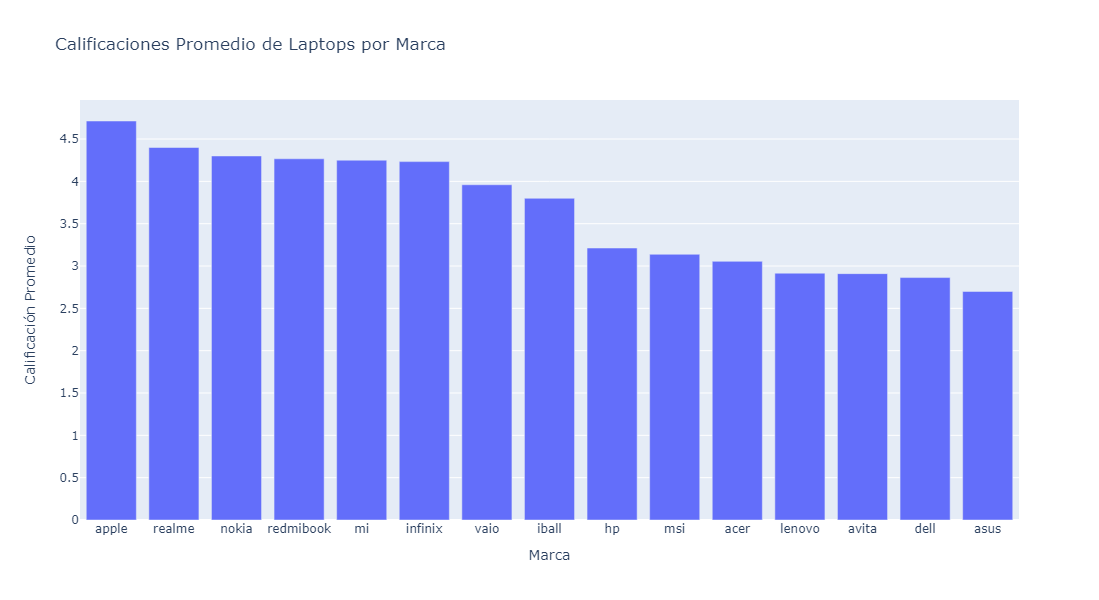

In [30]:
# Analisis de cuales son marcas con mejores calificaciones en promedio

# Convertimos los nombres de las marcas a minúsculas
data["brand"] = data["brand"].str.lower()

# Agrupamos por marca y calcular las estadísticas
brand_analysis = data.groupby("brand").agg({
    "star_rating": "mean",         # Media de las calificaciones
    "ratings": "sum",              # Total de calificaciones
    "reviews": "sum"               # Total de reseñas
}).reset_index()

# Renombramos las columnas para mayor claridad
brand_analysis.rename(columns={"star_rating": "average_rating", "ratings": "total_ratings", "reviews": "total_reviews"}, inplace=True)

# Filtramos marcas con suficientes calificaciones y reseñas
# Definimos un mínimo de calificaciones y reseñas que necesitamos
rating_threshold = 200  # al menos 200 calificaciones
review_threshold = 100   # al menos 100 reseñas

# Filtramos las marcas que cumplen con los criterios
filtered_brands = brand_analysis[(brand_analysis["total_ratings"] >= rating_threshold) & 
                                  (brand_analysis["total_reviews"] >= review_threshold)]


# Clasificamos las marcas por calificación promedio primero, luego por calificaciones y reseñas
sorted_brands = filtered_brands.sort_values(by=["average_rating", "total_ratings", "total_reviews"], ascending=[False, False, False])

# Creamos una gráfica de barras usando Plotly Express con tamaño personalizado
fig = px.bar(
    sorted_brands, 
    x="brand", 
    y="average_rating", 
    labels={"average_rating": "Calificación Promedio", "brand": "Marca"}, 
    title="Calificaciones Promedio de Laptops por Marca",
    width=1000,  # Ancho de la gráfica 
    height=600   # Alto de la gráfica
)

# Mostrar la gráfica
fig.show()

## Interpretación de los Resultados (Análisis de Popularidad de Marcas de Laptops)

En este análisis, Apple destaca como la marca mejor calificada con un promedio de 4.71 estrellas, significativamente por encima de otras marcas. Esta tendencia puede estar relacionada con el hecho de que Apple no tiene una gran cantidad de modelos de laptops en el mercado, lo que le permite un mayor control sobre la calidad de sus productos. Con una línea de laptops más limitada, Apple puede centrarse en ofrecer dispositivos de alta gama que satisfacen consistentemente las expectativas de sus usuarios, lo que se traduce en calificaciones más altas.

Por otro lado, marcas como HP y Dell, que son reconocidas por su popularidad y presencia en diversos segmentos del mercado, muestran un promedio de calificación más bajo. Esto puede deberse a que estas marcas ofrecen una amplia gama de modelos de laptops, desde opciones económicas hasta equipos de alto rendimiento. Con un catálogo tan diverso, es más difícil mantener un control de calidad uniforme en todos los dispositivos, lo que puede generar que algunos modelos reciban reseñas negativas y, por ende, disminuyan el promedio general de la marca.

Este fenómeno es un reflejo de los diferentes enfoques de mercado: mientras que Apple apuesta por una línea más exclusiva y controlada, HP y Dell buscan abarcar un mayor espectro de consumidores, lo que inevitablemente influye en las calificaciones. Aunque HP y Dell tienen modelos de laptops de excelente calidad, la presencia de dispositivos con menor rendimiento en su portafolio contribuye a que su promedio sea inferior.

Además, marcas como Realme y Nokia, aunque no tan populares como HP o Dell, han logrado posicionarse con calificaciones promedio altas, lo que indica que los usuarios valoran la calidad percibida de sus productos. La consistencia en la calidad de estos productos, aunque con menos reseñas totales, contribuye a su buena reputación.

# Análisis de Clasificación de Laptops por Gamas (baja, media y alta)

Este análisis es crucial para ayudar a los consumidores a tomar decisiones más informadas al elegir entre laptops de gama baja, media o alta. Los compradores pueden identificar las mejores opciones en cada rango de precios, basándose en el número de reseñas y calificaciones, lo que les da mayor confianza al hacer su elección. Esto permite adaptar la compra según el presupuesto y las necesidades específicas.

Para los fabricantes, este análisis revela qué categorías dominan el mercado y dónde se concentran las mejores valoraciones. Esto les permite ajustar sus productos y estrategias, mejorando su competitividad en cada segmento de precio. Tanto consumidores como empresas se benefician al obtener una visión más clara de la relación entre calidad y precio en cada categoría.

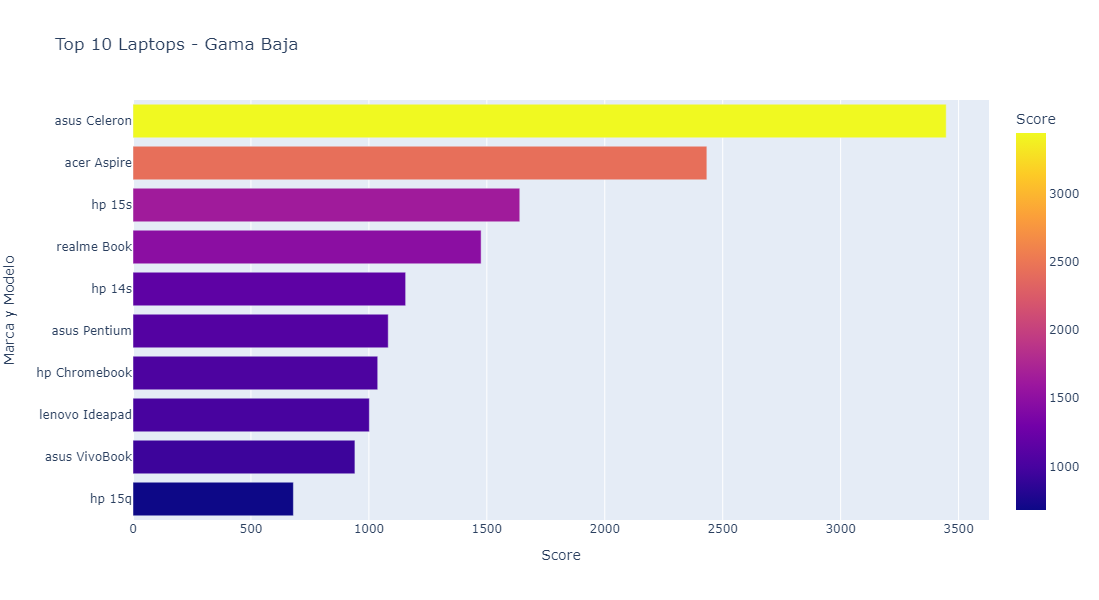

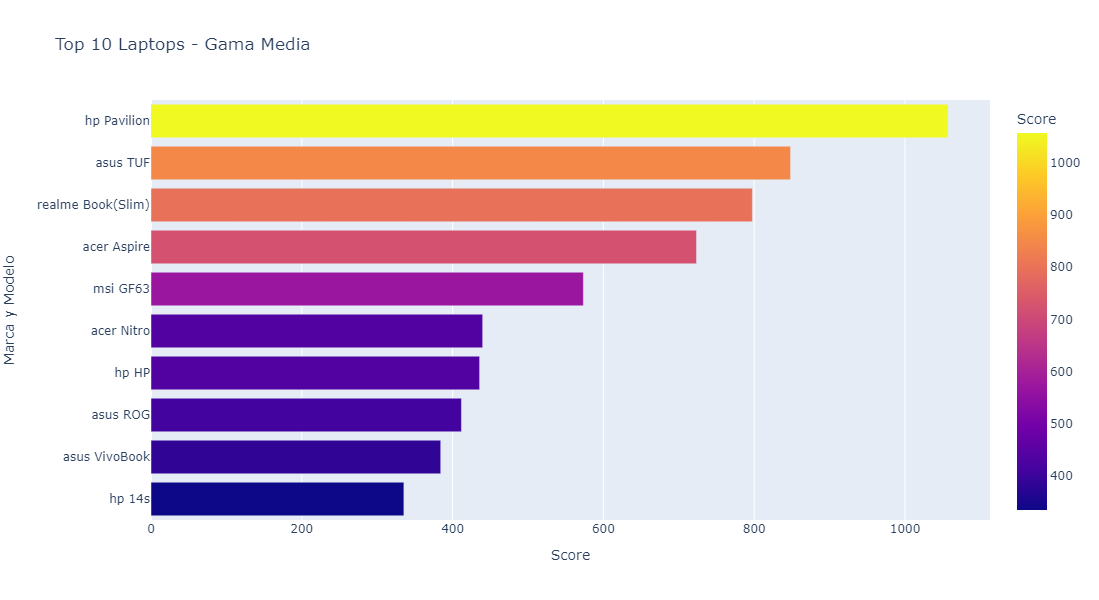

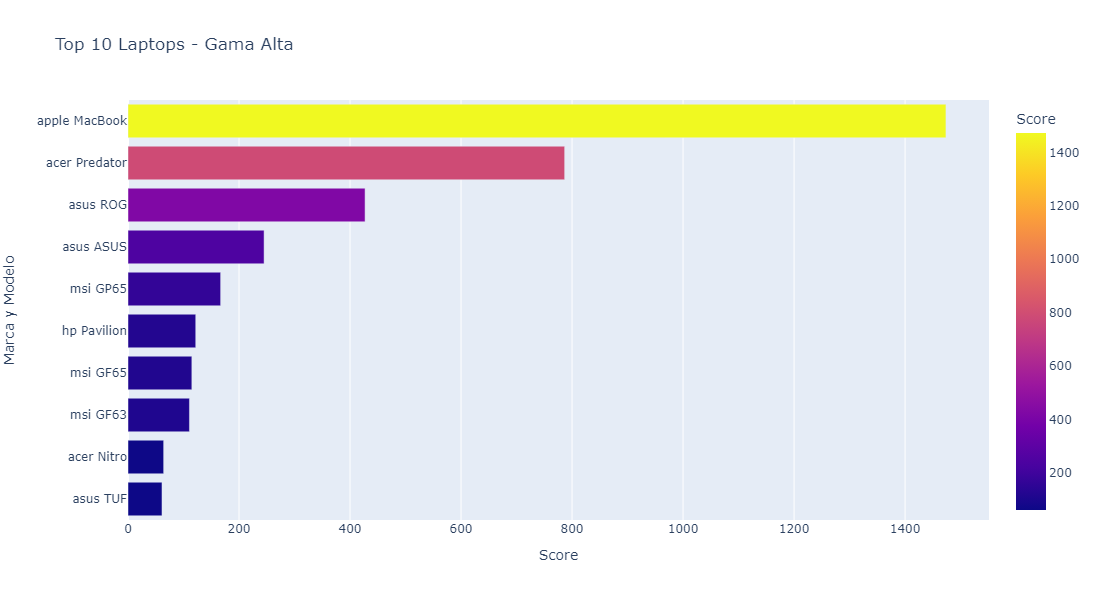

In [31]:
# Definimos los rangos de precios para dividir las laptops en gama baja, media y alta
low_price_limit = data["latest_price_usd"].quantile(0.33)
high_price_limit = data["latest_price_usd"].quantile(0.66)

# Clasificamos las laptops en tres categorías basadas en el precio
data["category"] = pd.cut(data["latest_price_usd"], bins=[0, low_price_limit, high_price_limit, data["latest_price_usd"].max()], 
                   labels=["Low-End", "Mid-Range", "High-End"])

# Creamos una columna "score" basada en la cantidad de estrellas, calificaciones y reseñas
# Ajustamos los pesos según lo necesario, priorizando mayor cantidad de calificaciones y reseñas
data["score"] = (data["star_rating"] * 0.6 + 
                 data["ratings"] * 0.2 + 
                 data["reviews"] * 0.2)

# Filtramos las mejores 10 laptops para cada categoría sin duplicar modelos
def get_best_laptops(category_data):
    # Eliminamos duplicados manteniendo el que tiene el mayor score
    category_data_unique = category_data.loc[category_data.groupby(['brand', 'model'])['score'].idxmax()]
    return category_data_unique.sort_values(by="score", ascending=False).head(10)

best_low_end = get_best_laptops(data[data["category"] == "Low-End"])
best_mid_range = get_best_laptops(data[data["category"] == "Mid-Range"])
best_high_end = get_best_laptops(data[data["category"] == "High-End"])

# Definimos una función para graficar las 10 mejores laptops de cada categoría
def plot_top_laptops(category_data, category_name):
    # Creamos la gráfica de barras horizontales
    fig = px.bar(
        category_data, 
        y=category_data['brand'] + ' ' + category_data['model'], 
        x='score', 
        title=f'Top 10 Laptops - {category_name}', 
        labels={'score': 'Score', 'y': 'Marca y Modelo'},
        orientation='h',
        color='score',  # Se puede usar el color según la puntuación
        color_continuous_scale='Plasma',  # Escala de color opcional
        width=1000,  # Ancho de la gráfica 
        height=600   # Alto de la gráfica
    )
    fig.update_layout(yaxis={'categoryorder':'total ascending'})  # Ordenar de mayor a menor
    fig.show()

# Graficamos los resultados para cada categoría
plot_top_laptops(best_low_end, 'Gama Baja')
plot_top_laptops(best_mid_range, 'Gama Media')
plot_top_laptops(best_high_end, 'Gama Alta')

## Interpretación de los Resultados (Análisis de Clasificación de Laptops por Gamas)

Este análisis de laptops por gama (baja, media y alta) utiliza un puntaje ponderado basado en tres factores principales: calificación por estrellas, cantidad de reseñas y número de calificaciones. El puntaje determina qué tan buena es una laptop en términos de satisfacción de los usuarios; a mayor puntaje, mejor es la laptop. De estos factores, la calificación por estrellas tiene la mayor ponderación, seguida de la cantidad de calificaciones y reseñas. Esto garantiza que las laptops con más retroalimentación tengan un lugar destacado, reflejando una visión más confiable y amplia del producto.

Un aspecto importante es que este análisis prioriza laptops con mayor cantidad de reseñas y calificaciones. En caso de que varias laptops tengan la misma calificación por estrellas, las laptops con más reseñas y calificaciones serán mejor ponderadas, ya que se consideran más probadas y confiables por la comunidad de usuarios.

En la gama baja, por ejemplo, el modelo "Celeron" de Asus, aunque tiene una calificación moderada de 3.8, se destaca debido al alto número de calificaciones y reseñas, lo que indica que ha sido ampliamente evaluado. En contraste, en la gama alta, el "MacBook" de Apple lidera con una calificación de 4.7, impulsado por un equilibrio entre una alta calificación por estrellas y un considerable número de reseñas, lo que refuerza su reputación de ca

Finalmente, las marcas con una amplia variedad de modelos, como Asus y HP, pueden tener tanto laptops de excelente rendimiento como de bajo puntaje, lo que influye en su promedio general en cada gama.lidad.